# Scrapy 

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as ny

In [ ]:
url_list = ['http://jokes.cc.com/joke-categories']
response = requests.get(url_list[0]).text
soup = BeautifulSoup(response, 'html.parser')

In [ ]:
lista_aux = str(soup.find('ul', attrs={'class':'list_horiz'})).split(' ')

In [ ]:
lista_url_categorias_piadas = []
for l in lista_aux:
    if l[:5] == 'href=':
        lista_url_categorias_piadas.append(l[6:-1])

In [ ]:
for url_categoria in [lista_url_categorias_piadas[-1]]:
    response = requests.get(url_categoria).text
    soup = BeautifulSoup(response, 'html.parser')
    lista_aux = str(soup.find('div', attrs={'class':'module_content'})).split(' ')
    lista_piadas = []
    for l in lista_aux:
        if l[:5] == 'href=':
            url_piadas= l[6:re.search('"><h3>', l).start()]
            response = requests.get(url_piadas).text
            soup = BeautifulSoup(response, 'html.parser')
            piada = str(soup.find('div', attrs={'class':'content_wrap'}))
            lista_piadas.append(piada)       
    pd_lista_piadas = pd.DataFrame({l[20:]: lista_piadas})
    nome = re.sub(':', '',(re.sub('/', '', url_categoria)))
    file_name = '/Users/felipesantos/Desktop/resultado/'+nome+'.csv'
    pd_lista_piadas.to_csv(file_name)

## Multi-Class Text Classification with Scikit-Learn 
Susan Li

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f 

Classifying Consumer Finance Complaints into 12 pre-defined classes.

Data Exploration  
    - Input: joke
    - Output: Category

Verifications of Labels: Imbalanced Classes 

    - When we encounter such problems(fraud detection or cancer prediction),
        we are bound to have difficulties solving them with standard algorithms.
    
        Conventional algorithms are often biased towards the majority class, 
            In the worst case, minority classes are treated as outliers and ignored.
    
    - In our case, the majority classes might be of our great interest? 
        YES! Therefore, we will leave it as it is.
    
      (maintaining reasonable accuracy for the minority classes)

Text Representation
    - texts are converted to a more manageable representation
    - Term Frequency, Inverse Document Frequency, abbreviated to tf-idf.

Model Selection
    - Naive Bayes Classifier
    - Logistic Regression
    - Random Forest

Model Evaluation

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as ny

#### Loading Data

In [2]:
url_list = ['http://jokes.cc.com/joke-categories']
response = requests.get(url_list[0]).text
soup = BeautifulSoup(response, 'html.parser')

In [3]:
lista_aux = str(soup.find('ul', attrs={'class':'list_horiz'})).split(' ')

In [4]:
lista_url_categorias_piadas = []
for l in lista_aux:
    if l[:5] == 'href=':
        lista_url_categorias_piadas.append(l[6:-1])

In [5]:
diretorio = '/Users/felipesantos/Desktop/resultado/'
arquivo =['httpjokes.cc.comfunny-animal','httpjokes.cc.comfunny-blonde','httpjokes.cc.comfunny-blue-collar',
          'httpjokes.cc.comfunny-cross-the-road','httpjokes.cc.comfunny-dark-humor','httpjokes.cc.comfunny-dirty',
          'httpjokes.cc.comfunny-doctor','httpjokes.cc.comfunny-fat','httpjokes.cc.comfunny-food',
          'httpjokes.cc.comfunny-god','httpjokes.cc.comfunny-gross','httpjokes.cc.comfunny-insults',
          'httpjokes.cc.comfunny-kids','httpjokes.cc.comfunny-lawyer','httpjokes.cc.comfunny-little-johnny',
          'httpjokes.cc.comfunny-lookin--good','httpjokes.cc.comfunny-marriage','httpjokes.cc.comfunny-men-women',
          'httpjokes.cc.comfunny-miscellaneous','httpjokes.cc.comfunny-money','httpjokes.cc.comfunny-nationality',
          'httpjokes.cc.comfunny-news---politics','httpjokes.cc.comfunny-nsfw','httpjokes.cc.comfunny-partying---bad-behavior',
          'httpjokes.cc.comfunny-pick-up-lines','httpjokes.cc.comfunny-police---military','httpjokes.cc.comfunny-pop-culture---celebrity',
          'httpjokes.cc.comfunny-school','httpjokes.cc.comfunny-sports---athletes','httpjokes.cc.comfunny-technology',
          'httpjokes.cc.comfunny-travel---car','httpjokes.cc.comfunny-walks-into-a-bar','httpjokes.cc.comfunny-work',
          'httpjokes.cc.comfunny-yo--mama']

In [6]:
df = pd.DataFrame()
for i in range(len(arquivo)):
    df_aux = pd.read_csv(diretorio+arquivo[i]+'.csv')
    df_aux = df_aux.iloc[:,[1]]
    df_aux.columns = ['joke']
    df_aux['label'] = i
    df = df.append(df_aux)

In [7]:
df.shape

(19789, 2)

In [8]:
df.head()

,joke,label
0,"<div class=""content_wrap""><a class=""prev"" href...",0
1,"<div class=""content_wrap""><a class=""prev"" href...",0
2,"<div class=""content_wrap""><a class=""prev"" href...",0
3,"<div class=""content_wrap""><a class=""prev"" href...",0
4,"<div class=""content_wrap""><a class=""prev"" href...",0


In [9]:
list(df.joke)[0]

'<div class="content_wrap"><a class="prev" href="http://jokes.cc.com/funny-animal/2rcy7k/a-kangaroo-walks-into-a-bar---">Previous</a><a class="next" href="http://jokes.cc.com/funny-animal/i08q3q/walks-into-a-bar----horsing-around">Next</a><p>A bear walks into a bar and says to the bartender, "I\'ll have a pint of beer and a.......... packet of peanuts."<p>The bartender asks, "Why the big pause?" </p></p></div>'

In [10]:
print(set(df.label))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


#### Cleaning text

In [11]:
list_aux = range(len(list(df.joke)))
joke_list = []
for i in list_aux:
    soup = BeautifulSoup(list(df['joke'])[i], 'html.parser')
    try:
        aux = str(soup.find('a', attrs={'class':'next'}))
        valor = re.search(aux, list(df['joke'])[i]).start()+len(aux)
        joke_list.append(list(df['joke'])[i][valor:])
    except:
        try:
            aux = str(soup.find('a', attrs={'class':'prev'}))
            valor = re.search(aux, list(df['joke'])[i]).start()+len(aux)
            joke_list.append(list(df['joke'])[i][valor:])
        except : joke_list.append(list(df['joke'])[i])

In [12]:
l = list(df.label)
l_1 = list(df.joke)
l_2 = []

for jok in joke_list:
    joke = jok.replace("div", " ").replace("br", " ").replace("/", " ")
    joke = joke.replace("p>", " ").replace(">", " ").replace("<", " ")
    l_2.append(joke)
df = pd.DataFrame({'label':l, 'joke_':l_1, 'joke':l_2})

In [13]:
list(df.joke)[0]

'  A bear walks into a bar and says to the bartender, "I\'ll have a pint of beer and a.......... packet of peanuts."  The bartender asks, "Why the big pause?"           '

###  34 Classes - imbalanced

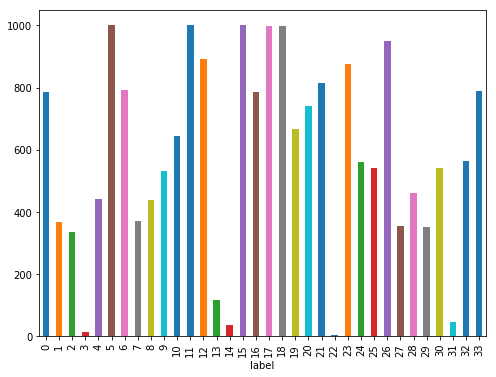

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('label').joke.count().plot.bar(ylim=0)
plt.show()

#### Text Representation

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2',
                        encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.joke).toarray()

In [17]:
df.shape

(19789, 3)

In [18]:
features.shape

(19789, 6625)

In [19]:
type(features)

numpy.ndarray

In [20]:
list(tfidf.vocabulary_.items())[:10]

[('bear', 500),
 ('walks', 6286),
 ('bar', 451),
 ('says', 5069),
 ('bartender', 471),
 ('ll', 3481),
 ('pint', 4400),
 ('beer', 521),
 ('packet', 4217),
 ('peanuts', 4291)]

In [21]:
df_joke_vec = pd.DataFrame(features,index = df.index).rename(columns = {v:k for k,v in tfidf.vocabulary_.items()})

In [22]:
df_joke_vec.head()

,00,000,000 year,10,10 00,10 000,10 minutes,10 pounds,10 years,100,...,young woman,younger,youngest,youth,ze,zero,zip,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_joke_vec.shape

(19789, 6625)

In [24]:
df.shape

(19789, 3)

In [25]:
from sklearn.feature_selection import chi2
#Compute chi-squared stats between each non-negative feature and class.
    ## This score can be used to select the n_features features with 
    ## the highest values for the test chi-squared statistic from X, 
    ## which must contain only non-negative features such as booleans or frequencies 
    ## (e.g., term counts in document classification), relative to the classes.

    ## Recall that the chi-square test measures dependence between stochastic variables, 
    ## so using this function “weeds out” the features that are the most likely to be 
    ## independent of class and therefore irrelevant for classification.
    
    # Testa se suas variaveis categoricas sao idempendentes


import numpy as np
N = 2
labels = df.label

#for label in list(set(df.label)):
for label in [0,6,8,23,29,31]:
    features_chi2 = chi2(features, labels == label)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]    
    print(arquivo[label][len('httpjokes.cc.com'):])
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
 #   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(trigrams[-N:])))    
    print(' ')

funny-animal
  . Most correlated unigrams:
. elephant
. dog
  . Most correlated bigrams:
. chicken cross
. cross road
 
funny-doctor
  . Most correlated unigrams:
. disease
. doctor
  . Most correlated bigrams:
. doctor doctor
. went doctor
 
funny-food
  . Most correlated unigrams:
. food
. eat
  . Most correlated bigrams:
. people eat
. want eat
 
funny-partying---bad-behavior
  . Most correlated unigrams:
. drinking
. bartender
  . Most correlated bigrams:
. bartender says
. walks bar
 
funny-technology
  . Most correlated unigrams:
. text
. computer
  . Most correlated bigrams:
. cell phone
. hard drive
 
funny-walks-into-a-bar
  . Most correlated unigrams:
. bar
. bartender
  . Most correlated bigrams:
. bar orders
. walks bar
 


In [26]:
df_joke_vec.shape

(19789, 6625)

In [27]:
df.shape

(19789, 3)

### Naive Bayes Classifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_joke_vec, df.label, random_state = 0,test_size=0.20)

In [30]:
clf = MultinomialNB().fit(X_train, y_train)

#### Accuracy 

In [31]:
predicted_y = clf.predict(X_train)
print("Train")
print(metrics.accuracy_score(y_train, predicted_y))
print(" ")

predicted_y = clf.predict(X_test)
print("Test")
print(metrics.accuracy_score(y_test, predicted_y))

Train
0.3903733181732045
 
Test
0.1707933299646286


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
#from sklearn.grid_search import GridSearchCV
#param_grid = { 
#    'n_estimators': [10, 50, 100, 200],
#    'max_depth': [3,5,10,15,20]}
#
# ------>   {'max_depth': 15, 'n_estimators': 200}

#param_grid = { 
#    'n_estimators': [200, 250],
#    'max_depth': [15]}
#
# ------>   {'max_depth': 15, 'n_estimators': 200}    


#CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
#CV_rf.fit(X, y)
#print (CV_rf.best_params_)

In [35]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Accuracy 

In [36]:
predicted_y = rf.predict(X_train.values)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = rf.predict(X_test.values)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.3025077379824395
 
Test
0.1571500757958565


#  

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
X = X_train.values
y = y_train.values
lr = LogisticRegression(random_state=0)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy 

In [39]:
predicted_y = lr.predict(X_train.values)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = lr.predict(X_test.values)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.43168466931968924
 
Test
0.18999494694290045


###  5 Classes - balanced

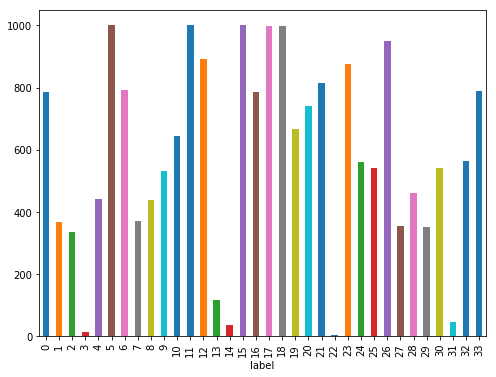

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('label').joke.count().plot.bar(ylim=0)
plt.show()

In [41]:
labels_ = [5,11,15,18,19]

In [42]:
df.set_index('label', inplace=True)

In [43]:
df = df.loc[labels_].copy()

In [44]:
df.reset_index(inplace=True)

In [45]:
df.sample()

,label,joke,joke_
1423,11,What should we expect from a compassionate c...,"<div class=""content_wrap""><a class=""prev"" href..."


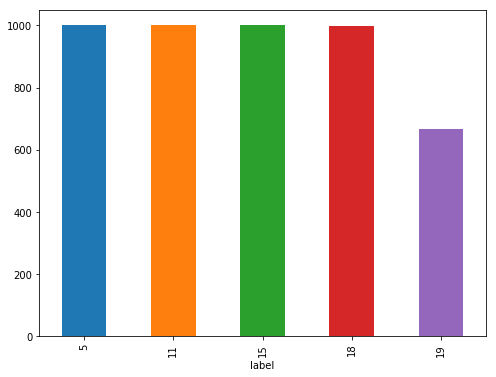

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('label').joke.count().plot.bar(ylim=0)
plt.show()

In [47]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2',
                        encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.joke).toarray()

In [48]:
df_joke_vec = pd.DataFrame(features,index = df.index).rename(columns = {v:k for k,v in tfidf.vocabulary_.items()})

### Naive Bayes Classifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_joke_vec, df.label, random_state = 0,test_size=0.20)

In [50]:
clf = MultinomialNB().fit(X_train, y_train)

#### Accuracy 

In [51]:
predicted_y = clf.predict(X_train)
print("Train")
print(metrics.accuracy_score(y_train, predicted_y))
print(" ")

predicted_y = clf.predict(X_test)
print("Test")
print(metrics.accuracy_score(y_test, predicted_y))

Train
0.6095927116827439
 
Test
0.3897216274089936


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, predicted_y)

array([[97, 11, 39, 53,  4],
       [31, 69, 53, 44, 11],
       [28, 39, 81, 21, 18],
       [58, 23, 36, 74,  5],
       [20, 12, 44, 20, 43]])

In [54]:
import seaborn as sns

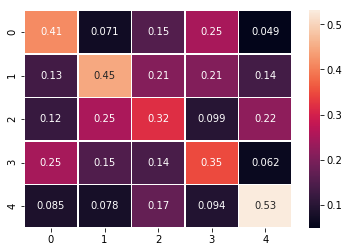

In [55]:
sns.heatmap(pd.DataFrame(data=confusion_matrix(y_test, predicted_y)).apply(lambda x: x / x.sum()), annot=True, linewidths=.5)

### Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Accuracy 

In [57]:
predicted_y = rf.predict(X_train.values)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = rf.predict(X_test.values)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.6189710610932476
 
Test
0.35974304068522484


In [58]:
confusion_matrix(y_test, predicted_y)

array([[134,   0,  14,  55,   1],
       [ 58,  32,  53,  55,  10],
       [ 56,  25,  66,  22,  18],
       [ 98,   4,  16,  72,   6],
       [ 45,   4,  35,  23,  32]])

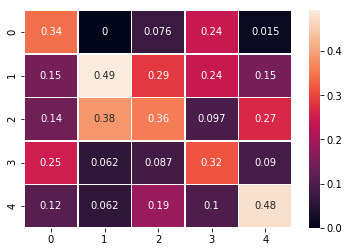

In [59]:
sns.heatmap(pd.DataFrame(data=confusion_matrix(y_test, predicted_y)).apply(lambda x: x / x.sum()), annot=True, linewidths=.5)

#  

### Logistic Regression

In [60]:
X = X_train.values
y = y_train.values
lr = LogisticRegression(random_state=0)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy 

In [61]:
predicted_y = lr.predict(X_train.values)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = lr.predict(X_test.values)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.65005359056806
 
Test
0.3929336188436831


In [62]:
confusion_matrix(y_test, predicted_y)

array([[106,   8,  26,  60,   4],
       [ 36,  61,  50,  46,  15],
       [ 37,  31,  76,  20,  23],
       [ 65,  23,  26,  75,   7],
       [ 23,  10,  41,  16,  49]])

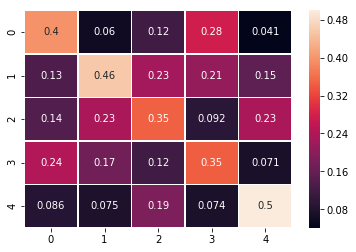

In [63]:
sns.heatmap(pd.DataFrame(data=confusion_matrix(y_test, predicted_y)).apply(lambda x: x / x.sum()), annot=True, linewidths=.5)